In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

sns.set_style("whitegrid")

# Random split

In [2]:
folder = "outputs/DRIAMS_B/MLP_random_split_fprint/lowLR_long_BN/metrics"
os.listdir(folder)

['test_metrics_8.json',
 'test_metrics_4.json',
 'test_metrics_1.json',
 'test_metrics_2.json',
 'test_metrics_0.json',
 'test_metrics_6.json',
 'test_metrics_7.json',
 'test_metrics_5.json',
 'test_metrics_9.json',
 'test_metrics_3.json']

In [4]:
metrics = []
for seed in range(10):
    try:
        with open(os.path.join(folder, "test_metrics_{}.json".format(seed)), "r") as f:
            m = json.load(f)
    except:
        continue
    metrics_names = list(m.keys())
    m["seed"] = seed
    metrics.append(m)
metrics_randsplit_df = pd.DataFrame(metrics)        
metrics_randsplit_df


,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,seed
0,0.220980,0.671185,0.803124,0.710420,0.812763,0.816577,0.635805,0
1,0.223357,0.645089,0.790351,0.687000,0.811112,0.793947,0.612412,1
2,0.230678,0.642216,0.792186,0.686991,0.800383,0.781785,0.619046,2
3,0.225250,0.649775,0.787071,0.687145,0.804489,0.815850,0.601843,3
4,0.227953,0.664810,0.803911,0.704907,0.810630,0.801266,0.639289,4
5,0.218269,0.666272,0.808764,0.710165,0.820161,0.789266,0.654102,5
6,0.210895,0.663304,0.794027,0.698233,0.826003,0.826997,0.614054,6
7,0.199751,0.711955,0.828243,0.747783,0.847569,0.836586,0.683404,7
8,0.214587,0.683336,0.817534,0.722448,0.817538,0.804369,0.667000,8
9,0.221108,0.662580,0.791781,0.696006,0.811404,0.832420,0.608823,9


In [6]:
metrics_long_table_randsplit = pd.melt(metrics_randsplit_df, id_vars="seed", value_vars=metrics_names)
metrics_long_table_randsplit["experiment"] = "Random Split"
metrics_long_table_randsplit

,seed,variable,value,experiment
0,0,test_loss,0.220980,Random Split
1,1,test_loss,0.223357,Random Split
2,2,test_loss,0.230678,Random Split
3,3,test_loss,0.225250,Random Split
4,4,test_loss,0.227953,Random Split
...,...,...,...,...
65,5,test_recall,0.654102,Random Split
66,6,test_recall,0.614054,Random Split
67,7,test_recall,0.683404,Random Split
68,8,test_recall,0.667000,Random Split


In [7]:
# fig, ax = plt.subplots(figsize=(14,10))
# sns.barplot(data=metrics_long_table, x="variable", y="value", ax=ax)
# plt.show()

# Partitioned 

In [8]:
folder = "outputs/DRIAMS_B/MLP_partition/lowLR_long_BN_part/metrics"
os.listdir(folder)

['test_metrics_8.json',
 'test_metrics_4.json',
 'test_metrics_1.json',
 'test_metrics_2.json',
 'test_metrics_6.json',
 'test_metrics_7.json',
 'test_metrics_5.json',
 'test_metrics_9.json',
 'test_metrics_3.json']

In [10]:
metrics = []
for seed in range(10):
    try:
        with open(os.path.join(folder, "test_metrics_{}.json".format(seed)), "r") as f:
            m = json.load(f)
    except:
        continue
    metrics_names = list(m.keys())
    m["seed"] = seed
    metrics.append(m)
metrics_partition_df = pd.DataFrame(metrics)     
metrics_long_table_part = pd.melt(metrics_partition_df, id_vars="seed", value_vars=metrics_names)
metrics_long_table_part["experiment"] = "Partitioned Split"
metrics_long_table_part
metrics_long_table_part

,seed,variable,value,experiment
0,1,test_loss,0.461755,Partitioned Split
1,2,test_loss,0.400357,Partitioned Split
2,3,test_loss,0.460688,Partitioned Split
3,4,test_loss,0.559934,Partitioned Split
4,5,test_loss,0.455243,Partitioned Split
...,...,...,...,...
58,5,test_recall,0.381475,Partitioned Split
59,6,test_recall,0.400218,Partitioned Split
60,7,test_recall,0.389683,Partitioned Split
61,8,test_recall,0.482743,Partitioned Split


In [13]:
experiments_df = pd.concat([metrics_long_table_randsplit, metrics_long_table_part])
experiments_df

,seed,variable,value,experiment
0,0,test_loss,0.220980,Random Split
1,1,test_loss,0.223357,Random Split
2,2,test_loss,0.230678,Random Split
3,3,test_loss,0.225250,Random Split
4,4,test_loss,0.227953,Random Split
...,...,...,...,...
58,5,test_recall,0.381475,Partitioned Split
59,6,test_recall,0.400218,Partitioned Split
60,7,test_recall,0.389683,Partitioned Split
61,8,test_recall,0.482743,Partitioned Split


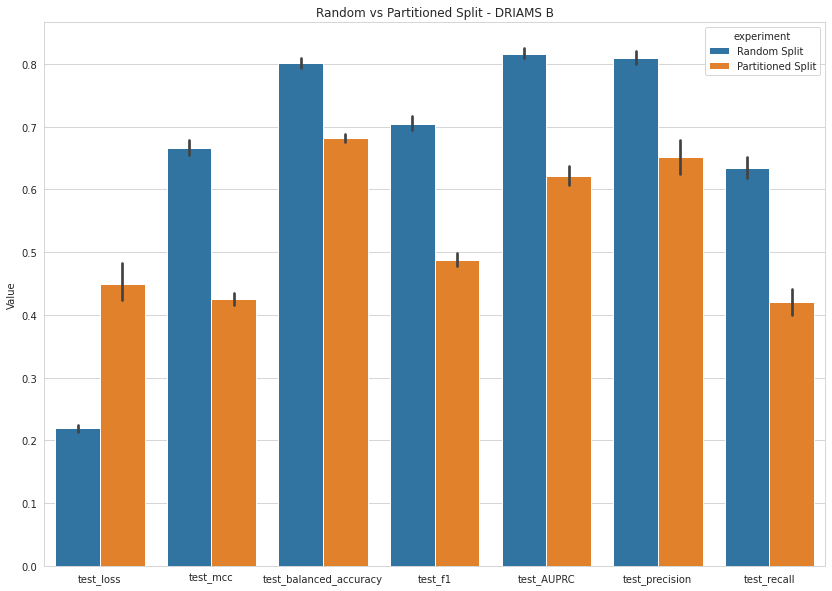

In [18]:
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=experiments_df, x="variable", y="value", hue="experiment", ax=ax)
ax.set_title("Random vs Partitioned Split - DRIAMS B")
ax.set_xlabel("")
ax.set_ylabel("Value")
fig.savefig("outputs/plots/B_rand_vs_partition.png", facecolor="white")
plt.show()

In [27]:
from models.data_utils import DataSplitter

long_table = pd.read_csv("../processed_data/DRIAMS_combined_long_table.csv")

ds = DataSplitter(long_table, dataset="B")
len(ds.long_table)

32377

In [30]:
test_df, trainval_df = ds.drug_zero_shot_split(drug="Cefepime")
test_df

,species,sample_id,drug,response,dataset
0,Klebsiella pneumoniae,ca568529-351a-43af-8cec-7175488f66ea,Cefepime,0,B
1,Proteus mirabilis,0fd4fd1a-8233-400d-bdee-f0c13819dc6b,Cefepime,0,B
2,Staphylococcus aureus,b1fa5e1c-d013-4716-b4b0-6552ad1c50de,Cefepime,0,B
3,Staphylococcus aureus,00aa2ddb-1819-475c-85e6-ed39d6efe6bc,Cefepime,0,B
4,Proteus mirabilis,c81323a2-fabb-428b-a002-1cc7c5b5c0ad,Cefepime,0,B
...,...,...,...,...,...
1684,Escherichia coli,753d577a-d8a0-4929-acaf-39dd8c214196,Cefepime,0,B
1685,Staphylococcus aureus,02cf7dfe-c0c0-46e4-8848-168ddb20a336,Cefepime,0,B
1686,Staphylococcus lugdunensis,80cb2c77-a65a-4ad9-ad6e-f0c076fcd839,Cefepime,0,B
1687,Staphylococcus aureus,68d1147b-1606-46e3-a515-e992f0f84455,Cefepime,0,B


In [31]:
trainval_df

,species,sample_id,drug,response,dataset
0,Klebsiella pneumoniae,ca568529-351a-43af-8cec-7175488f66ea,Amikacin,0,B
1,Klebsiella pneumoniae,ca568529-351a-43af-8cec-7175488f66ea,Ampicillin,1,B
2,Klebsiella pneumoniae,ca568529-351a-43af-8cec-7175488f66ea,Cefoxitin,0,B
3,Klebsiella pneumoniae,ca568529-351a-43af-8cec-7175488f66ea,Ceftazidime,0,B
4,Klebsiella pneumoniae,ca568529-351a-43af-8cec-7175488f66ea,Ceftriaxone,0,B
...,...,...,...,...,...
30683,Staphylococcus aureus,57043b13-3ba8-4f30-83ac-2416c23cec3a,Rifampicin,0,B
30684,Staphylococcus aureus,57043b13-3ba8-4f30-83ac-2416c23cec3a,Teicoplanin,0,B
30685,Staphylococcus aureus,57043b13-3ba8-4f30-83ac-2416c23cec3a,Tetracycline,0,B
30686,Staphylococcus aureus,57043b13-3ba8-4f30-83ac-2416c23cec3a,Tigecycline,0,B


# Zero shot

In [19]:
long_table = pd.read_csv("../processed_data/DRIAMS_combined_long_table.csv")
long_table = long_table[long_table["dataset"]=="B"]

drugs_list = sorted(long_table["drug"].unique())
len(drugs_list)

33

In [21]:
experiment_folder = "outputs/DRIAMS_B/MLP_zero_shot/lowLR_long_BN_zs/metrics"
len(os.listdir(experiment_folder))

31

In [25]:
zs_metrics = []
for i, drug_name in enumerate(drugs_list):
    try:
        with open(os.path.join(experiment_folder, "test_metrics_{}.json".format(seed)), "r") as f:
            m = json.load(f)
            m["drug"] = drug_name
    except:
        continue
    zs_metrics.append(m)
zs_df = pd.DataFrame(zs_metrics)
zs_df.set_index("drug")
zs_df


,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,drug
0,0.431903,0.439314,0.675992,0.489833,0.632429,0.703237,0.396727,Amikacin
1,0.431903,0.439314,0.675992,0.489833,0.632429,0.703237,0.396727,Ampicillin
2,0.431903,0.439314,0.675992,0.489833,0.632429,0.703237,0.396727,Benzylpenicillin
3,0.431903,0.439314,0.675992,0.489833,0.632429,0.703237,0.396727,Cefepime
4,0.431903,0.439314,0.675992,0.489833,0.632429,0.703237,0.396727,Cefoxitin
5,0.431903,0.439314,0.675992,0.489833,0.632429,0.703237,0.396727,Ceftazidime
6,0.431903,0.439314,0.675992,0.489833,0.632429,0.703237,0.396727,Ceftriaxone
7,0.431903,0.439314,0.675992,0.489833,0.632429,0.703237,0.396727,Cefuroxime
8,0.431903,0.439314,0.675992,0.489833,0.632429,0.703237,0.396727,Ciprofloxacin
9,0.431903,0.439314,0.675992,0.489833,0.632429,0.703237,0.396727,Clarithromycin


In [23]:
m

{'test_loss': 0.43190306425094604,
 'test_mcc': 0.43931380619518623,
 'test_balanced_accuracy': 0.6759923542024993,
 'test_f1': 0.4898326721338671,
 'test_AUPRC': 0.6324290326785281,
 'test_precision': 0.703237345001273,
 'test_recall': 0.3967273348455159}